In [1]:
#import labries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from ipywidgets import interact 
f= pd.read_csv('D:\A71_CHINMAY\sem5\ml\lab\lab6 - recommandation\data.csv')

f.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
f.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [3]:
Y=f['label']
X=f.drop(['label'],axis=1)
print("shape of X",X.shape)
print("shape of Y:",Y.shape) 

shape of X (2200, 7)
shape of Y: (2200,)


In [4]:
#split the data set into traing and testing 
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

print(" the shape of X train:",X_train.shape)
print(" the shape of x test:",X_test.shape)
print (" shape of Y train:",Y_train.shape)
print("shape of Y test",Y_test.shape)

 the shape of X train: (1760, 7)
 the shape of x test: (440, 7)
 shape of Y train: (1760,)
shape of Y test (440,)


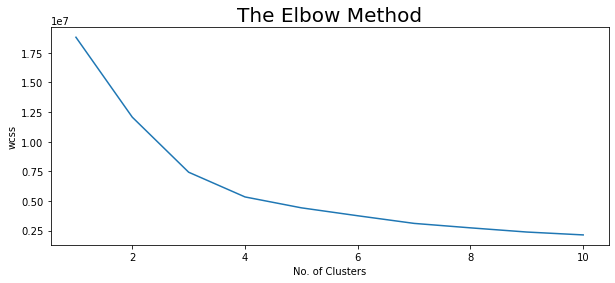

In [5]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)
wcss=[]
for i in range(1, 11):

  km= KMeans (n_clusters =i)
  km.fit(X)
  wcss.append(km.inertia_)

# Lets plot the results plt.plot(range(1, 11), wess)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize= 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss') 
plt.show()

In [6]:
#Cluster the data using k means clustering 

from sklearn.cluster import KMeans
km = KMeans (n_clusters =4, init= 'k-means++', max_iter =300, n_init = 10, random_state=0)
Y_means = km.fit_predict(X)
#Lets find out the Results
a= f["label"]
Y_means = pd.DataFrame(Y_means)
z= pd.concat([Y_means, a], axis = 1)
z=z.rename (columns ={0: 'cluster'})

#Lets check the Clusters of each crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster']==0]['label'].unique())
print("----------------------------------------------------------------------------------------------")
print("Crops in Second Clusteri", z[z['cluster']==1]['label'].unique()) 
print("----------------------------------------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster']==2]['label'].unique())
print("----------------------------------------------------------------------------------------------")
print("Crops in Forth Clusten:", z[z['cluster']== 3]['label'].unique())


Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
----------------------------------------------------------------------------------------------
Crops in Second Clusteri ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
----------------------------------------------------------------------------------------------
Crops in Third Cluster: ['grapes' 'apple']
----------------------------------------------------------------------------------------------
Crops in Forth Clusten: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [7]:
#fit the model

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
#prediction

prediction=model.predict((np.array([[100,
                                     79,
                                     52,
                                     25,
                                     81,
                                     5,
                                     95]])))
print("crop:",prediction)

crop: ['banana']


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='col_0', ylabel='label'>

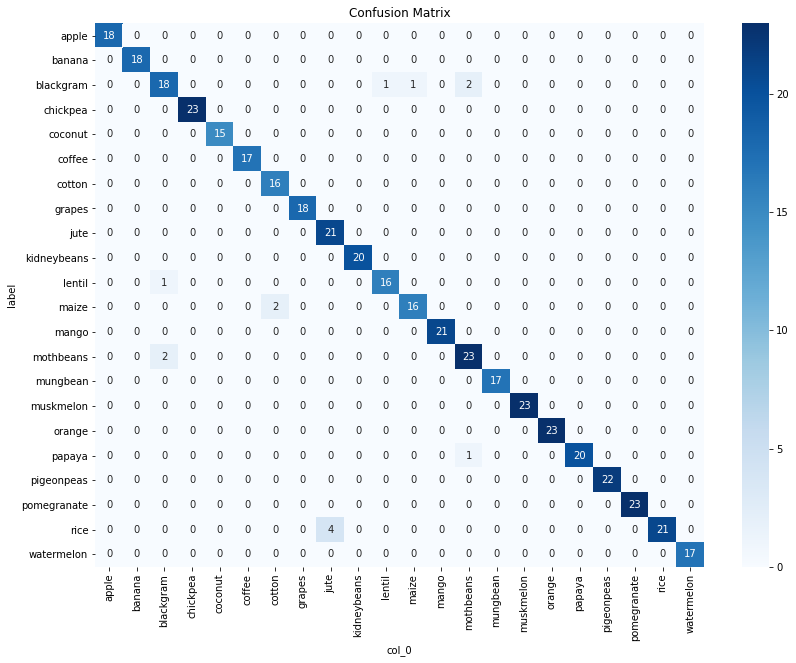

In [9]:
#confusion matrix

import seaborn as sn
confusion = pd.crosstab(Y_test,Y_pred)
fig=plt.figure(figsize=(30,10))
axl=plt.subplot(121)
axl.set_title("Confusion Matrix")
sn.heatmap(confusion,annot=True,cmap='Blues')


In [10]:
#classification report

from sklearn.metrics import classification_report
cr=classification_report(Y_test,Y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    